In [2]:
library(dplyr)
library(ggplot2)
library(data.table)
library(Hmisc)
library(MESS)

In [3]:
w0 <- read.csv(file="C:/Users/Chen/Project/data/w0.csv")
dim(w0)
head(w0)

[1] 1472   70

Date,ID,Station2,Tmax2,Tmin2,Tavg2,DewPoint2,WetBulb2,Heat2,Cool2,...,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCTS,RA45,PT45_gt05
01/05/2007,1,2,84,52,33,51,26,1,4,...,0,0,0,0,0,0,0,0,NA,NA
02/05/2007,2,2,60,43,17,42,16,6,1,...,0,0,0,0,0,0,0,0,NA,NA
03/05/2007,3,2,67,48,23,40,19,28,1,...,0,0,0,0,0,0,0,0,NA,NA
04/05/2007,4,2,78,51,NA,42,19,NA,NA,...,0,0,1,0,0,0,0,0,NA,NA
05/05/2007,5,2,66,54,25,39,19,26,1,...,0,0,0,0,0,0,0,0,NA,NA
06/05/2007,6,2,68,52,25,30,15,26,1,...,0,0,0,0,0,0,0,0,NA,NA


In [4]:
w0$Date <- as.Date(w0$Date, format = "%d/%m/%Y")
str(w0)

'data.frame':	1472 obs. of  70 variables:
 $ Date            : Date, format: "2007-05-01" "2007-05-02" ...
 $ ID              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Station2        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Tmax2           : int  84 60 67 78 66 68 84 80 76 83 ...
 $ Tmin2           : int  52 43 48 51 54 52 50 60 63 59 ...
 $ Tavg2           : int  33 17 23 NA 25 25 32 35 35 36 ...
 $ DewPoint2       : int  51 42 40 42 39 30 39 57 60 52 ...
 $ WetBulb2        : int  26 16 19 19 19 15 22 32 32 30 ...
 $ Heat2           : int  1 6 28 NA 26 26 1 1 1 1 ...
 $ Cool2           : int  4 1 1 NA 1 1 3 6 6 7 ...
 $ PrecipTotal2    : num  0 0 0 0 0 0 0 0 0.02 0 ...
 $ StnPressure2    : num  29.2 29.4 29.5 29.4 29.5 ...
 $ SeaLevel2       : num  29.8 30.1 30.1 30 30.1 ...
 $ ResultSpeed2    : num  2.7 13.3 12.9 10.1 11.2 13.8 8.5 2.5 3.9 2 ...
 $ ResultDir2      : int  25 2 6 7 7 10 17 8 7 9 ...
 $ AvgSpeed2       : num  9.6 13.4 13.2 10.4 11.5 14.5 9.9 5.4 5.9 3.9 ...
 $ BCFG2           : int 

In [5]:
colnames(w0)

[1] "Date"             "ID"               "Station2"         "Tmax2"           
 [5] "Tmin2"            "Tavg2"            "DewPoint2"        "WetBulb2"        
 [9] "Heat2"            "Cool2"            "PrecipTotal2"     "StnPressure2"    
[13] "SeaLevel2"        "ResultSpeed2"     "ResultDir2"       "AvgSpeed2"       
[17] "BCFG2"            "BR2"              "DZ2"              "FG2"             
[21] "FG.2"             "FU2"              "GR2"              "HZ2"             
[25] "RA2"              "SN2"              "SQ2"              "TS2"             
[29] "TSRA2"            "VCFG2"            "VCTS2"            "Tmax2.imp"       
[33] "Tavg2.imp"        "PrecipTotal2.imp" "RA45.2"           "PT45_gt052"      
[37] "Station"          "Tmax"             "Tmin"             "Tavg"            
[41] "Depart"           "DewPoint"         "WetBulb"          "Heat"            
[45] "Cool"             "Sunrise"          "Sunset"           "SnowFall"        
[49] "PrecipTotal"      "StnPressure"      "SeaLevel"         "ResultSpeed"     
[53] "ResultDir"        "AvgSpeed"         "BCFG"             "BR"              
[57] "DZ"               "FG"               "FG."              "FU"              
[61] "HZ"               "MIFG"             "RA"               "SN"              
[65] "SQ"               "TS"               "TSRA"             "VCTS"            
[69] "RA45"             "PT45_gt05"

In [6]:
vars <- c('Date', 'ID', 'Tmax2', 'Tmin2', 'Tavg2', 'DewPoint2', 'WetBulb2', 'Heat2', 'Cool2','PrecipTotal2.imp', 'StnPressure2', 'SeaLevel2', 'ResultSpeed2', 'ResultDir2', 'AvgSpeed2', 'BCFG2', 'BR2', 'DZ2', 'FG2', 'FG.2', 'FU2', 'GR2', 'HZ2', 'RA2', 'SN2', 'SQ2', 'TS2', 'TSRA2', 'VCFG2', 'VCTS2', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'BCFG', 'BR', 'DZ', 'FG', 'FG.', 'FU', 'HZ', 'MIFG', 'RA', 'SN', 'SQ', 'TS', 'TSRA', 'VCTS')
w03 <- w0[vars]


In [7]:
dim(w03)
head(w03)

[1] 1472   61

Date,ID,Tmax2,Tmin2,Tavg2,DewPoint2,WetBulb2,Heat2,Cool2,PrecipTotal2.imp,...,FG.,FU,HZ,MIFG,RA,SN,SQ,TS,TSRA,VCTS
2007-05-01,1,84,52,33,51,26,1,4,0,...,0,0,0,0,0,0,0,0,0,0
2007-05-02,2,60,43,17,42,16,6,1,0,...,0,0,0,0,0,0,0,0,0,0
2007-05-03,3,67,48,23,40,19,28,1,0,...,0,0,0,0,0,0,0,0,0,0
2007-05-04,4,78,51,NA,42,19,NA,NA,0,...,0,0,0,0,1,0,0,0,0,0
2007-05-05,5,66,54,25,39,19,26,1,0,...,0,0,0,0,0,0,0,0,0,0
2007-05-06,6,68,52,25,30,15,26,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
w01.imp<- read.csv(file="C:/Users/Chen/Project/data/w01.imp.csv")
dim(w01.imp)
head(w01.imp)

[1] 1471   12

ID,Tmax2,WetBulb2,RA2,TSRA2,StnPressure,PrecipTotal,PrecipTotal2.imp,RA45.2,PT45_gt052,RA45,PT45_gt05
1,84,26,0,0,29.10,0,0,15.74811,1.0023159,15.75511,0.9578708
2,60,16,0,0,29.38,0,0,12.24724,0.9357264,11.42741,0.8316392
3,67,19,0,0,29.39,0,0,16.15893,0.9136058,15.92101,0.8191412
4,78,19,0,0,29.31,0,0,10.95013,0.9232722,14.05338,0.7954528
5,66,19,0,0,29.40,0,0,17.26332,0.9707625,16.91719,0.9490688
6,68,15,0,0,29.57,0,0,17.03916,0.9470216,16.91410,0.9866144


In [8]:
describe(w03)

w03 

 61  Variables      1472  Observations
--------------------------------------------------------------------------------
Date 
       n  missing distinct 
    1472        0     1472 

lowest : 2007-05-01 2007-05-02 2007-05-03 2007-05-04 2007-05-05
highest: 2014-10-27 2014-10-28 2014-10-29 2014-10-30 2014-10-31
--------------------------------------------------------------------------------
ID 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1472        0     1472        1    736.5      491    74.55   148.10 
     .25      .50      .75      .90      .95 
  368.75   736.50  1104.25  1324.90  1398.45 

lowest :    1    2    3    4    5, highest: 1468 1469 1470 1471 1472
--------------------------------------------------------------------------------
Tmax2 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1472        0       61    0.999    76.35    12.84    54.55    60.00 
     .25      .50      .75      .90      .95 
   69.00  

In [13]:
w04<- merge(x = w03, y = w01.imp, by = "ID", all.x = TRUE)
dim(w04)
head(w04)

[1] 1472   72

ID,Date,Tmax2.x,Tmin2,Tavg2,DewPoint2,WetBulb2.x,Heat2,Cool2,PrecipTotal2.imp.x,...,WetBulb2.y,RA2.y,TSRA2.y,StnPressure.y,PrecipTotal.y,PrecipTotal2.imp.y,RA45.2,PT45_gt052,RA45,PT45_gt05
1,2007-05-01,84,52,33,51,26,1,4,0,...,26,0,0,29.10,0,0,15.74811,1.0023159,15.75511,0.9578708
2,2007-05-02,60,43,17,42,16,6,1,0,...,16,0,0,29.38,0,0,12.24724,0.9357264,11.42741,0.8316392
3,2007-05-03,67,48,23,40,19,28,1,0,...,19,0,0,29.39,0,0,16.15893,0.9136058,15.92101,0.8191412
4,2007-05-04,78,51,NA,42,19,NA,NA,0,...,19,0,0,29.31,0,0,10.95013,0.9232722,14.05338,0.7954528
5,2007-05-05,66,54,25,39,19,26,1,0,...,19,0,0,29.40,0,0,17.26332,0.9707625,16.91719,0.9490688
6,2007-05-06,68,52,25,30,15,26,1,0,...,15,0,0,29.57,0,0,17.03916,0.9470216,16.91410,0.9866144


In [11]:
#w01.imp$Date <- as.Date(w01.imp$Date, format = "%Y-%m-%d")

In [14]:
colnames(w04)

[1] "ID"                 "Date"               "Tmax2.x"           
 [4] "Tmin2"              "Tavg2"              "DewPoint2"         
 [7] "WetBulb2.x"         "Heat2"              "Cool2"             
[10] "PrecipTotal2.imp.x" "StnPressure2"       "SeaLevel2"         
[13] "ResultSpeed2"       "ResultDir2"         "AvgSpeed2"         
[16] "BCFG2"              "BR2"                "DZ2"               
[19] "FG2"                "FG.2"               "FU2"               
[22] "GR2"                "HZ2"                "RA2.x"             
[25] "SN2"                "SQ2"                "TS2"               
[28] "TSRA2.x"            "VCFG2"              "VCTS2"             
[31] "Tmax"               "Tmin"               "Tavg"              
[34] "Depart"             "DewPoint"           "WetBulb"           
[37] "Heat"               "Cool"               "Sunrise"           
[40] "Sunset"             "SnowFall"           "PrecipTotal.x"     
[43] "StnPressure.x"      "SeaLevel"           "ResultSpeed"       
[46] "ResultDir"          "AvgSpeed"           "BCFG"              
[49] "BR"                 "DZ"                 "FG"                
[52] "FG."                "FU"                 "HZ"                
[55] "MIFG"               "RA"                 "SN"                
[58] "SQ"                 "TS"                 "TSRA"              
[61] "VCTS"               "Tmax2.y"            "WetBulb2.y"        
[64] "RA2.y"              "TSRA2.y"            "StnPressure.y"     
[67] "PrecipTotal.y"      "PrecipTotal2.imp.y" "RA45.2"            
[70] "PT45_gt052"         "RA45"               "PT45_gt05"

In [15]:
vars5 <- c('Date', 'ID', 'Tmax2.x', 'Tmin2', 'Tavg2', 'DewPoint2', 'WetBulb2.x', 'Heat2', 'Cool2','PrecipTotal2.imp.x', 'StnPressure2', 'SeaLevel2', 'ResultSpeed2', 'ResultDir2', 'AvgSpeed2', 'BCFG2', 'BR2', 'DZ2', 'FG2', 'FG.2', 'FU2', 'GR2', 'HZ2', 'RA2.x','RA45.2', 'SN2', 'SQ2', 'TS2', 'TSRA2.x', 'VCFG2', 'VCTS2', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'SnowFall', 'PrecipTotal.x', 'StnPressure.x', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'BCFG', 'BR', 'DZ', 'FG', 'FG.', 'FU', 'HZ', 'MIFG', 'RA','RA45', 'SN', 'SQ', 'TS', 'TSRA', 'VCTS')
w05 <- w04[vars5]


In [16]:
dim(w05)
head(w05)

[1] 1472   63

Date,ID,Tmax2.x,Tmin2,Tavg2,DewPoint2,WetBulb2.x,Heat2,Cool2,PrecipTotal2.imp.x,...,FU,HZ,MIFG,RA,RA45,SN,SQ,TS,TSRA,VCTS
2007-05-01,1,84,52,33,51,26,1,4,0,...,0,0,0,0,15.75511,0,0,0,0,0
2007-05-02,2,60,43,17,42,16,6,1,0,...,0,0,0,0,11.42741,0,0,0,0,0
2007-05-03,3,67,48,23,40,19,28,1,0,...,0,0,0,0,15.92101,0,0,0,0,0
2007-05-04,4,78,51,NA,42,19,NA,NA,0,...,0,0,0,1,14.05338,0,0,0,0,0
2007-05-05,5,66,54,25,39,19,26,1,0,...,0,0,0,0,16.91719,0,0,0,0,0
2007-05-06,6,68,52,25,30,15,26,1,0,...,0,0,0,0,16.91410,0,0,0,0,0


In [19]:
PPT3<- read.csv(file="C:/Users/Chen/Project/data/PPT3.csv")
dim(PPT3)
head(PPT3)

[1] 1716    5

Date,pre45_1_2,pre45_1,pre45_05,pre45_052
2007-03-01,NA,NA,NA,NA
2007-03-02,NA,NA,NA,NA
2007-03-03,NA,NA,NA,NA
2007-03-04,NA,NA,NA,NA
2007-03-05,NA,NA,NA,NA
2007-03-06,NA,NA,NA,NA


In [20]:
PPT3$Date <- as.Date(PPT3$Date, format = "%Y-%m-%d")

In [21]:
str(PPT3)

'data.frame':	1716 obs. of  5 variables:
 $ Date     : Date, format: "2007-03-01" "2007-03-02" ...
 $ pre45_1_2: int  NA NA NA NA NA NA NA NA NA NA ...
 $ pre45_1  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ pre45_05 : int  NA NA NA NA NA NA NA NA NA NA ...
 $ pre45_052: int  NA NA NA NA NA NA NA NA NA NA ...


In [22]:
w06<- merge(x = w05, y = PPT3, by = "Date", all.x = TRUE)
dim(w06)
head(w06)

[1] 1472   67

Date,ID,Tmax2.x,Tmin2,Tavg2,DewPoint2,WetBulb2.x,Heat2,Cool2,PrecipTotal2.imp.x,...,RA45,SN,SQ,TS,TSRA,VCTS,pre45_1_2,pre45_1,pre45_05,pre45_052
2007-05-01,1,84,52,33,51,26,1,4,0,...,15.75511,0,0,0,0,0,1,1,1,1
2007-05-02,2,60,43,17,42,16,6,1,0,...,11.42741,0,0,0,0,0,1,1,1,1
2007-05-03,3,67,48,23,40,19,28,1,0,...,15.92101,0,0,0,0,0,1,1,1,1
2007-05-04,4,78,51,NA,42,19,NA,NA,0,...,14.05338,0,0,0,0,0,1,1,1,1
2007-05-05,5,66,54,25,39,19,26,1,0,...,16.91719,0,0,0,0,0,1,1,1,1
2007-05-06,6,68,52,25,30,15,26,1,0,...,16.91410,0,0,0,0,0,1,1,1,1


In [23]:
head(w06)

Date,ID,Tmax2.x,Tmin2,Tavg2,DewPoint2,WetBulb2.x,Heat2,Cool2,PrecipTotal2.imp.x,...,RA45,SN,SQ,TS,TSRA,VCTS,pre45_1_2,pre45_1,pre45_05,pre45_052
2007-05-01,1,84,52,33,51,26,1,4,0,...,15.75511,0,0,0,0,0,1,1,1,1
2007-05-02,2,60,43,17,42,16,6,1,0,...,11.42741,0,0,0,0,0,1,1,1,1
2007-05-03,3,67,48,23,40,19,28,1,0,...,15.92101,0,0,0,0,0,1,1,1,1
2007-05-04,4,78,51,NA,42,19,NA,NA,0,...,14.05338,0,0,0,0,0,1,1,1,1
2007-05-05,5,66,54,25,39,19,26,1,0,...,16.91719,0,0,0,0,0,1,1,1,1
2007-05-06,6,68,52,25,30,15,26,1,0,...,16.91410,0,0,0,0,0,1,1,1,1


In [24]:
w06$Date <- as.Date(w06$Date, format = "%Y-%m-%d")

In [25]:
str(w06)

'data.frame':	1472 obs. of  67 variables:
 $ Date              : Date, format: "2007-05-01" "2007-05-02" ...
 $ ID                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Tmax2.x           : int  84 60 67 78 66 68 84 80 76 83 ...
 $ Tmin2             : int  52 43 48 51 54 52 50 60 63 59 ...
 $ Tavg2             : int  33 17 23 NA 25 25 32 35 35 36 ...
 $ DewPoint2         : int  51 42 40 42 39 30 39 57 60 52 ...
 $ WetBulb2.x        : int  26 16 19 19 19 15 22 32 32 30 ...
 $ Heat2             : int  1 6 28 NA 26 26 1 1 1 1 ...
 $ Cool2             : int  4 1 1 NA 1 1 3 6 6 7 ...
 $ PrecipTotal2.imp.x: num  0 0 0 0 0 0 0 0 0.02 0 ...
 $ StnPressure2      : num  29.2 29.4 29.5 29.4 29.5 ...
 $ SeaLevel2         : num  29.8 30.1 30.1 30 30.1 ...
 $ ResultSpeed2      : num  2.7 13.3 12.9 10.1 11.2 13.8 8.5 2.5 3.9 2 ...
 $ ResultDir2        : int  25 2 6 7 7 10 17 8 7 9 ...
 $ AvgSpeed2         : num  9.6 13.4 13.2 10.4 11.5 14.5 9.9 5.4 5.9 3.9 ...
 $ BCFG2             : int  0 0 0 0 0 0 0 0 0

In [26]:
colnames(w06)

[1] "Date"               "ID"                 "Tmax2.x"           
 [4] "Tmin2"              "Tavg2"              "DewPoint2"         
 [7] "WetBulb2.x"         "Heat2"              "Cool2"             
[10] "PrecipTotal2.imp.x" "StnPressure2"       "SeaLevel2"         
[13] "ResultSpeed2"       "ResultDir2"         "AvgSpeed2"         
[16] "BCFG2"              "BR2"                "DZ2"               
[19] "FG2"                "FG.2"               "FU2"               
[22] "GR2"                "HZ2"                "RA2.x"             
[25] "RA45.2"             "SN2"                "SQ2"               
[28] "TS2"                "TSRA2.x"            "VCFG2"             
[31] "VCTS2"              "Tmax"               "Tmin"              
[34] "Tavg"               "Depart"             "DewPoint"          
[37] "WetBulb"            "Heat"               "Cool"              
[40] "Sunrise"            "Sunset"             "SnowFall"          
[43] "PrecipTotal.x"      "StnPressure.x"      "SeaLevel"          
[46] "ResultSpeed"        "ResultDir"          "AvgSpeed"          
[49] "BCFG"               "BR"                 "DZ"                
[52] "FG"                 "FG."                "FU"                
[55] "HZ"                 "MIFG"               "RA"                
[58] "RA45"               "SN"                 "SQ"                
[61] "TS"                 "TSRA"               "VCTS"              
[64] "pre45_1_2"          "pre45_1"            "pre45_05"          
[67] "pre45_052"

In [27]:
grep("RA2.x", colnames(w06))

[1] 24 29

In [28]:
colnames(w06)[3] <- "Tmax2"
colnames(w06)[7] <- "WetBulb2"
colnames(w06)[10] <- "PrecipTotal2"
colnames(w06)[43] <- "PrecipTotal"
colnames(w06)[44] <- "StnPressure"
colnames(w06)[24] <- "RA2"
colnames(w06)[29] <- "TSRA2"


In [29]:
w06[with(w06,order(Date)),]

Date,ID,Tmax2,Tmin2,Tavg2,DewPoint2,WetBulb2,Heat2,Cool2,PrecipTotal2,...,RA45,SN,SQ,TS,TSRA,VCTS,pre45_1_2,pre45_1,pre45_05,pre45_052
2007-05-01,1,84,52,33,51,26,1,4,0.00,...,15.755110,0,0,0,0,0,1,1,1,1
2007-05-02,2,60,43,17,42,16,6,1,0.00,...,11.427410,0,0,0,0,0,1,1,1,1
2007-05-03,3,67,48,23,40,19,28,1,0.00,...,15.921007,0,0,0,0,0,1,1,1,1
2007-05-04,4,78,51,NA,42,19,NA,NA,0.00,...,14.053379,0,0,0,0,0,1,1,1,1
2007-05-05,5,66,54,25,39,19,26,1,0.00,...,16.917190,0,0,0,0,0,1,1,1,1
2007-05-06,6,68,52,25,30,15,26,1,0.00,...,16.914097,0,0,0,0,0,1,1,1,1
2007-05-07,7,84,50,32,39,22,1,3,0.00,...,11.038378,0,0,0,0,0,1,1,1,1
2007-05-08,8,80,60,35,57,32,1,6,0.00,...,16.726722,0,0,0,0,0,1,1,1,1
2007-05-09,9,76,63,35,60,32,1,6,0.02,...,11.449989,0,0,0,0,0,1,1,1,1
2007-05-10,10,83,59,36,52,30,1,7,0.00,...,13.850827,0,0,0,0,0,1,1,1,1


In [30]:
write.csv(w06, file="C:/Users/Chen/Project/data/w06.csv", row.names =F)

In [31]:
ff8 <- read.csv(file="C:/Users/Chen/Project/data/ffWNV8.csv")
dim(ff8)
head(ff8)

[1] 4616   98

Date,ID.OB,Month_Yr,Address,Block,Latitude,Longitude,Street,CULEX_ERRATICUS,CULEX_PIPIENS,...,RA,SN,SQ,TS,TSRA,VCTS,RA45,PT45_gt05,RA45.imp,PT45_gt05.imp
2007-05-29,1,2007-05,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,41.86711,-87.65422,W ROOSEVELT,0,0,...,0,0,0,0,0,0,NA,NA,13.68854,0.9421917
2007-05-29,2,2007-05,"1100 South Peoria Street, Chicago, IL 60608, USA",11,41.86229,-87.64886,S PEORIA ST,0,0,...,0,0,0,0,0,0,NA,NA,13.68854,0.9421917
2007-05-29,3,2007-05,"1100 West Chicago Avenue, Chicago, IL 60642, USA",11,41.89628,-87.65523,W CHICAGO,0,0,...,0,0,0,0,0,0,NA,NA,13.68854,0.9421917
2007-05-29,4,2007-05,"1500 North Long Avenue, Chicago, IL 60651, USA",15,41.90765,-87.76089,N LONG AVE,0,0,...,0,0,0,0,0,0,NA,NA,13.68854,0.9421917
2007-05-29,5,2007-05,"1500 West Webster Avenue, Chicago, IL 60614, USA",15,41.92160,-87.66645,W WEBSTER AVE,0,0,...,0,0,0,0,0,0,NA,NA,13.68854,0.9421917
2007-05-29,6,2007-05,"1700 West 95th Street, Chicago, IL 60643, USA",17,41.72085,-87.66601,W 95TH ST,0,0,...,0,0,0,0,0,0,NA,NA,13.68854,0.9421917


In [32]:
ff8$Date <- as.Date(ff8$Date, format = "%Y-%m-%d")

In [33]:
str(ff8)

'data.frame':	4616 obs. of  98 variables:
 $ Date                  : Date, format: "2007-05-29" "2007-05-29" ...
 $ ID.OB                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Month_Yr              : Factor w/ 20 levels "2007-05","2007-06",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address               : Factor w/ 138 levels "1000 East 67th Street, Chicago, IL 60637, USA",..: 6 8 10 14 16 19 26 28 29 32 ...
 $ Block                 : int  11 11 11 15 15 17 21 22 22 22 ...
 $ Latitude              : num  41.9 41.9 41.9 41.9 41.9 ...
 $ Longitude             : num  -87.7 -87.6 -87.7 -87.8 -87.7 ...
 $ Street                : Factor w/ 128 levels "  W ARMITAGE AVENUE",..: 124 75 108 27 128 103 42 18 88 102 ...
 $ CULEX_ERRATICUS       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CULEX_PIPIENS         : int  0 0 0 0 0 0 0 0 0 1 ...
 $ CULEX_PIPIENS_RESTUANS: int  1 0 0 0 0 0 1 2 1 0 ...
 $ CULEX_RESTUANS        : int  2 1 1 1 2 3 0 3 1 5 ...
 $ CULEX_SALINARIUS      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CULEX_TARSALIS

In [43]:
colnames(ff8)

[1] "Date"                   "ID.OB"                  "Month_Yr"              
 [4] "Address"                "Block"                  "Latitude"              
 [7] "Longitude"              "Street"                 "CULEX_ERRATICUS"       
[10] "CULEX_PIPIENS"          "CULEX_PIPIENS_RESTUANS" "CULEX_RESTUANS"        
[13] "CULEX_SALINARIUS"       "CULEX_TARSALIS"         "CULEX_TERRITANS"       
[16] "Month"                  "ParasiticIn."           "Influenza."            
[19] "Spray"                  "Year"                   "TrapM"                 
[22] "WnvPresentB"            "ID.y"                   "ID.y.1"                
[25] "Station2"               "Tmax2"                  "Tmin2"                 
[28] "Tavg2"                  "DewPoint2"              "WetBulb2"              
[31] "Heat2"                  "Cool2"                  "PrecipTotal2"          
[34] "StnPressure2"           "SeaLevel2"              "ResultSpeed2"          
[37] "ResultDir2"             "AvgSpeed2"              "BCFG2"                 
[40] "BR2"                    "DZ2"                    "FG2"                   
[43] "FG.2"                   "FU2"                    "GR2"                   
[46] "HZ2"                    "RA2"                    "SN2"                   
[49] "SQ2"                    "TS2"                    "TSRA2"                 
[52] "VCFG2"                  "VCTS2"                  "Tmax2.imp"             
[55] "Tavg2.imp"              "PrecipTotal2.imp"       "RA45.2"                
[58] "PT45_gt052.imp"         "Tmax2.i"                "RA45.2i"               
[61] "PT45_gt052.i"           "ID"                     "Station"               
[64] "Tmax"                   "Tmin"                   "Tavg"                  
[67] "Depart"                 "DewPoint"               "WetBulb"               
[70] "Heat"                   "Cool"                   "Sunrise"               
[73] "Sunset"                 "SnowFall"               "PrecipTotal"           
[76] "StnPressure"            "SeaLevel"               "ResultSpeed"           
[79] "ResultDir"              "AvgSpeed"               "BCFG"                  
[82] "BR"                     "DZ"                     "FG"                    
[85] "FG."                    "FU"                     "HZ"                    
[88] "MIFG"                   "RA"                     "SN"                    
[91] "SQ"                     "TS"                     "TSRA"                  
[94] "VCTS"                   "RA45"                   "PT45_gt05"             
[97] "RA45.imp"               "PT45_gt05.imp"

In [34]:
var8<-c('Date', 'ID.OB', 'Month_Yr', 'Address', 'Block', 'Latitude', 'Longitude', 'Street', 'CULEX_ERRATICUS', 'CULEX_PIPIENS', 'CULEX_PIPIENS_RESTUANS', 'CULEX_RESTUANS', 'CULEX_SALINARIUS', 'CULEX_TARSALIS', 'CULEX_TERRITANS', 'Month', 'ParasiticIn.', 'Influenza.', 'Spray', 'Year', 'TrapM', 'WnvPresentB', 'ID.y')
ff9<-ff8[var8]
head(ff9)
dim(ff9)

Date,ID.OB,Month_Yr,Address,Block,Latitude,Longitude,Street,CULEX_ERRATICUS,CULEX_PIPIENS,...,CULEX_TARSALIS,CULEX_TERRITANS,Month,ParasiticIn.,Influenza.,Spray,Year,TrapM,WnvPresentB,ID.y
2007-05-29,1,2007-05,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,41.86711,-87.65422,W ROOSEVELT,0,0,...,0,0,5,0.26,0.8,0,2007,48,0,29
2007-05-29,2,2007-05,"1100 South Peoria Street, Chicago, IL 60608, USA",11,41.86229,-87.64886,S PEORIA ST,0,0,...,0,0,5,0.26,0.8,0,2007,91,0,29
2007-05-29,3,2007-05,"1100 West Chicago Avenue, Chicago, IL 60642, USA",11,41.89628,-87.65523,W CHICAGO,0,0,...,0,0,5,0.26,0.8,0,2007,49,0,29
2007-05-29,4,2007-05,"1500 North Long Avenue, Chicago, IL 60651, USA",15,41.90765,-87.76089,N LONG AVE,0,0,...,0,0,5,0.26,0.8,0,2007,153,0,29
2007-05-29,5,2007-05,"1500 West Webster Avenue, Chicago, IL 60614, USA",15,41.92160,-87.66645,W WEBSTER AVE,0,0,...,0,0,5,0.26,0.8,0,2007,45,0,29
2007-05-29,6,2007-05,"1700 West 95th Street, Chicago, IL 60643, USA",17,41.72085,-87.66601,W 95TH ST,0,0,...,0,0,5,0.26,0.8,0,2007,94,0,29


[1] 4616   23

In [35]:
ff9<- merge(x = ff9, y = w06, by = "Date", all.x = TRUE)
dim(ff9)
head(ff9)


[1] 4616   89

Date,ID.OB,Month_Yr,Address,Block,Latitude,Longitude,Street,CULEX_ERRATICUS,CULEX_PIPIENS,...,RA45,SN,SQ,TS,TSRA,VCTS,pre45_1_2,pre45_1,pre45_05,pre45_052
2007-05-29,1,2007-05,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,41.86711,-87.65422,W ROOSEVELT,0,0,...,15.77226,0,0,0,0,0,1,1,1,1
2007-05-29,2,2007-05,"1100 South Peoria Street, Chicago, IL 60608, USA",11,41.86229,-87.64886,S PEORIA ST,0,0,...,15.77226,0,0,0,0,0,1,1,1,1
2007-05-29,3,2007-05,"1100 West Chicago Avenue, Chicago, IL 60642, USA",11,41.89628,-87.65523,W CHICAGO,0,0,...,15.77226,0,0,0,0,0,1,1,1,1
2007-05-29,4,2007-05,"1500 North Long Avenue, Chicago, IL 60651, USA",15,41.90765,-87.76089,N LONG AVE,0,0,...,15.77226,0,0,0,0,0,1,1,1,1
2007-05-29,5,2007-05,"1500 West Webster Avenue, Chicago, IL 60614, USA",15,41.92160,-87.66645,W WEBSTER AVE,0,0,...,15.77226,0,0,0,0,0,1,1,1,1
2007-05-29,6,2007-05,"1700 West 95th Street, Chicago, IL 60643, USA",17,41.72085,-87.66601,W 95TH ST,0,0,...,15.77226,0,0,0,0,0,1,1,1,1


In [36]:
describe(ff9)

ff9 

 89  Variables      4616  Observations
--------------------------------------------------------------------------------
Date 
       n  missing distinct 
    4616        0       95 

lowest : 2007-05-29 2007-06-05 2007-06-26 2007-06-29 2007-07-02
highest: 2013-08-29 2013-09-06 2013-09-12 2013-09-19 2013-09-26
--------------------------------------------------------------------------------
ID.OB 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4616        0     4616        1     2308     1539    231.8    462.5 
     .25      .50      .75      .90      .95 
  1154.8   2308.5   3462.2   4154.5   4385.2 

lowest :    1    2    3    4    5, highest: 4612 4613 4614 4615 4616
--------------------------------------------------------------------------------
Month_Yr 
       n  missing distinct 
    4616        0       20 

2007-05 (18, 0.004), 2007-06 (120, 0.026), 2007-07 (260, 0.056), 2007-08 (574,
0.124), 2007-09 (382, 0.083), 2007-10 (105, 0.023), 2009-05 

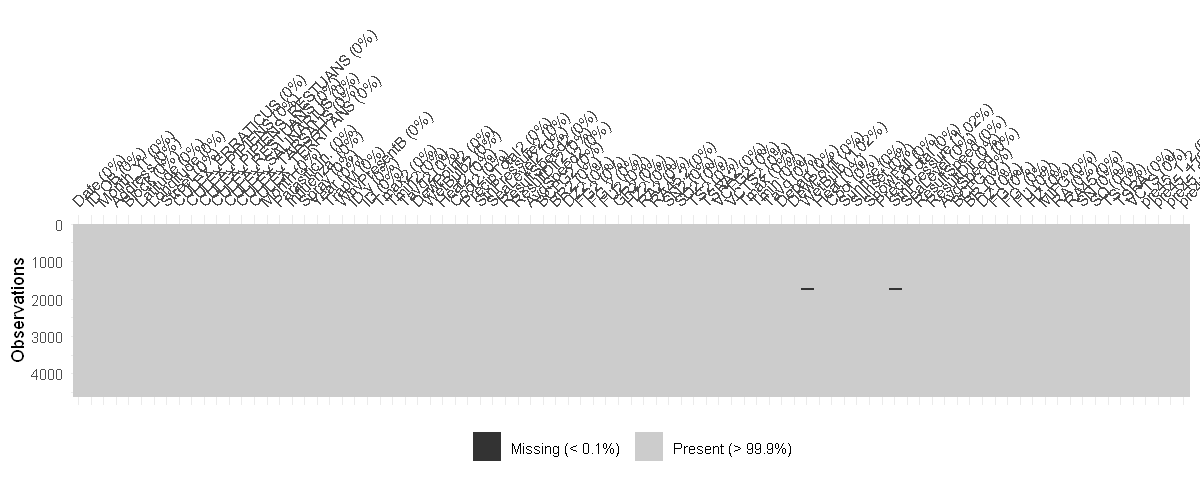

In [39]:
options(repr.plot.width = 10, repr.plot.height = 4)
vis_miss(ff9)

In [38]:
library(dplyr)
library(ggplot2)
if(!require(ggExtra)) {install.packages("ggExtra");require(ggExtra)}
if(!require(naniar)) {install.packages("naniar");require(naniar)}
if(!require(mvoutlier)) {install.packages("mvoutlier");require(mvoutlier)}
if(!require(MissMech)) {install.packages("MissMech");require(MissMech)}
if(!require(mice)) {install.packages("mice");require(mice)}
if(!require(MatchIt)) {install.packages("MatchIt");require(MatchIt)}

Loading required package: ggExtra
Warning message:
"package 'ggExtra' was built under R version 3.5.2"Loading required package: naniar
Warning message:
"package 'naniar' was built under R version 3.5.2"Loading required package: mvoutlier
Warning message:
"package 'mvoutlier' was built under R version 3.5.2"Loading required package: sgeostat
Warning message:
"package 'sgeostat' was built under R version 3.5.2"sROC 0.1-2 loaded
Loading required package: MissMech
Warning message:
"package 'MissMech' was built under R version 3.5.2"Loading required package: mice
Warning message:
"package 'mice' was built under R version 3.5.2"
Attaching package: 'mice'

The following objects are masked from 'package:base':

    cbind, rbind

Loading required package: MatchIt
Warning message:
"package 'MatchIt' was built under R version 3.5.2"

In [40]:
write.csv(ff9, file="C:/Users/Chen/Project/data/ff9.csv", row.names =F)